In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from encodings.aliases import aliases # Python has a file containing a dictionary of encoding names and associated aliases

# the matplotlib plots will appear directly below the cell in which the plot function was called.
%matplotlib inline

In [6]:
# To find encodings that work

# Below line creates a set of all available encodings
alias_values = set(aliases.values())

for encoding in set(aliases.values()):
    try:
        df=pd.read_csv("crime.csv", nrows=10, encoding=encoding) # read in only 10 lines for faster read
        print('successful', encoding)
    except:
        pass

successful cp852
successful cp857
successful cp1140
successful cp1026
successful cp855
successful cp1257
successful cp1252
successful cp860
successful mac_roman
successful cp037
successful mac_iceland
successful iso8859_7
successful mac_turkish
successful iso8859_3
successful cp775
successful ptcp154
successful utf_16_be
successful kz1048
successful iso8859_13
successful mac_latin2
successful cp858
successful iso8859_6
successful iso8859_15
successful cp866
successful iso8859_10
successful cp1253
successful cp865
successful koi8_r
successful cp862
successful big5hkscs
successful cp1255
successful cp949
successful cp1254
successful utf_16_le
successful cp500
successful iso8859_5
successful cp273
successful cp861
successful iso8859_2
successful iso8859_8
successful cp1258
successful iso8859_14
successful iso8859_4
successful cp869
successful cp932
successful cp1250
successful cp1256
successful latin_1
successful gbk
successful cp437
successful cp1125
successful cp850
successful cp863
suc

In [7]:
# Read in the crime.csv file and use the timestamp as a datetime index
bnb = pd.read_csv("AB_NYC_2019.csv", encoding="ISO-8859-11")

In [8]:
bnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [28]:
bnb.shape

(48895, 16)

In [29]:
bnb.duplicated().sum()

0

In [30]:
bnb.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [31]:
bnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [32]:
bnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [33]:
bnb.describe(include='object')

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47905,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,18,417,21661,3920,25409,1413


In [34]:
bnb.columns[np.sum(bnb.isnull()) != 0]

Index(['name', 'host_name', 'last_review', 'reviews_per_month'], dtype='object')

In [35]:
# Checking for the number of missing values in each column
print('Missing values in each column \n')
bnb[bnb.columns].isnull().sum()

Missing values in each column 



id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [36]:
# Checking for the number of unique values in each column
for col in bnb.columns:
    unique_count = bnb[col].nunique()
    print(col + " has " + str(unique_count) + " unique values")

id has 48895 unique values
name has 47905 unique values
host_id has 37457 unique values
host_name has 11452 unique values
neighbourhood_group has 5 unique values
neighbourhood has 221 unique values
latitude has 19048 unique values
longitude has 14718 unique values
room_type has 3 unique values
price has 674 unique values
minimum_nights has 109 unique values
number_of_reviews has 394 unique values
last_review has 1764 unique values
reviews_per_month has 937 unique values
calculated_host_listings_count has 47 unique values
availability_365 has 366 unique values


In [37]:
bnb.neighbourhood_group.value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

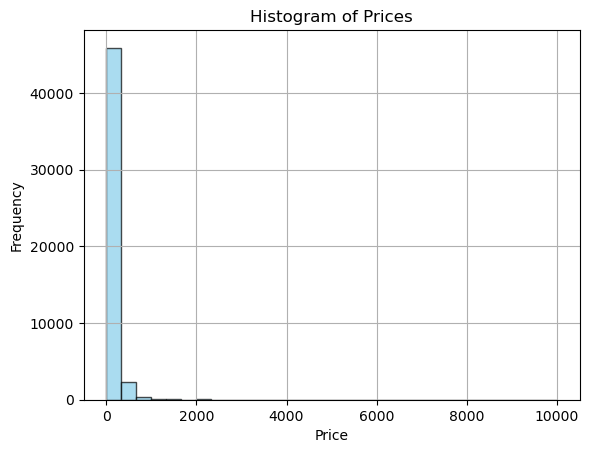

In [13]:
# Histogram of prices:
bnb['price'].hist(bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Prices')
plt.show()

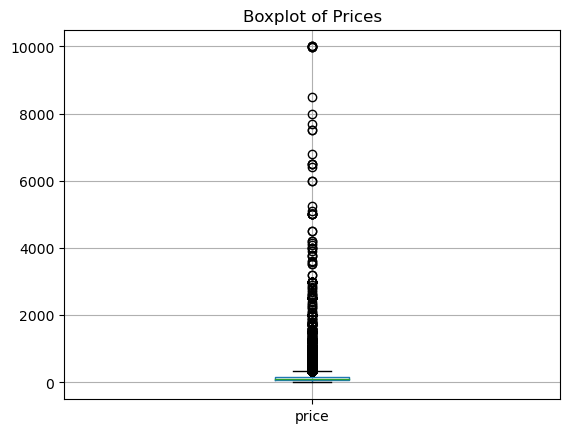

In [33]:
# Boxplot of prices:
bnb.boxplot(column='price')
plt.title('Boxplot of Prices')
plt.show()

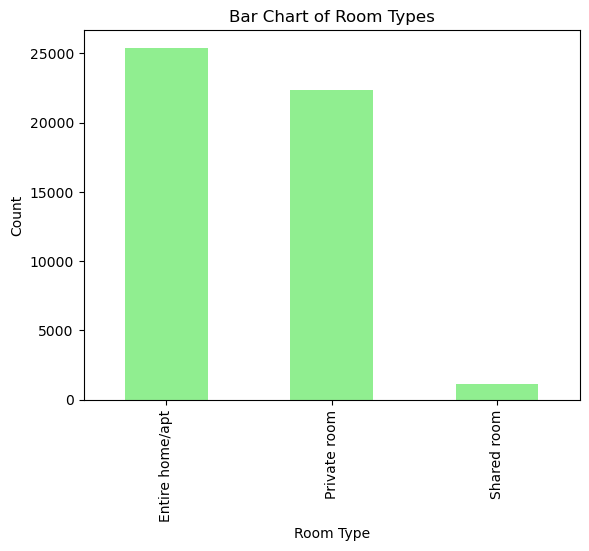

In [11]:
# Bar chart of room types:
room_type_counts = bnb['room_type'].value_counts()
room_type_counts.plot(kind='bar', color='lightgreen')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Bar Chart of Room Types')
plt.show()

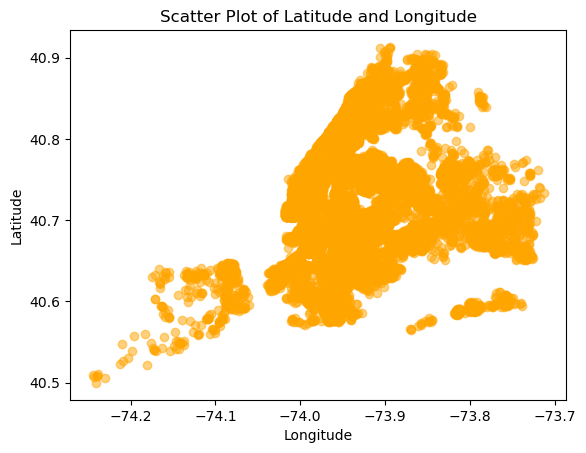

In [12]:
# Scatter plot of latitude and longitude:

plt.scatter(bnb['longitude'], bnb['latitude'], color='orange', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Latitude and Longitude')
plt.show()

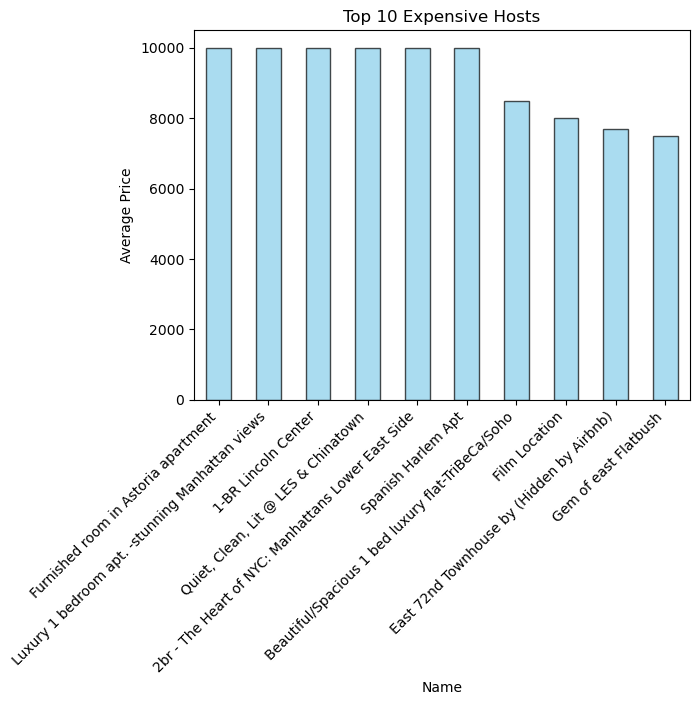

In [15]:
# Group by host_name and calculate the average price for each host
host_avg_price = bnb.groupby('name')['price'].mean().sort_values(ascending=False)

# Select the top 10 hosts with the highest average price
top_10_hosts = host_avg_price.head(10)

# Plotting the top 10 expensive hosts
top_10_hosts.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Name')
plt.ylabel('Average Price')
plt.title('Top 10 Expensive Hosts')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [16]:
# Calculate the average price for each neighborhood group
neighborhood_group_avg_price = bnb.groupby('neighbourhood_group')['price'].mean()

# Calculate the ranks of each neighborhood group's price
neighborhood_group_ranks = neighborhood_group_avg_price.rank(ascending=False)

# Sort the ranks in ascending order
neighborhood_group_ranks = neighborhood_group_ranks.sort_values()

# Display the ranks
print(neighborhood_group_ranks)

neighbourhood_group
Manhattan        1.0
Brooklyn         2.0
Staten Island    3.0
Queens           4.0
Bronx            5.0
Name: price, dtype: float64


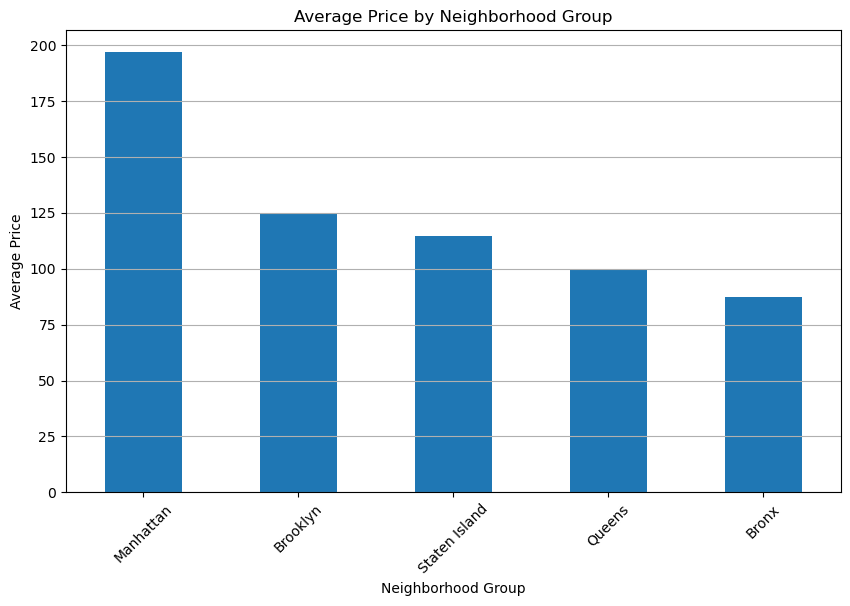

In [19]:
# Calculate the average price for each neighborhood group
neighborhood_group_avg_price = bnb.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)

# Plot the average price of each neighborhood group
neighborhood_group_avg_price.plot(kind='bar', figsize=(10, 6))
plt.title('Average Price by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

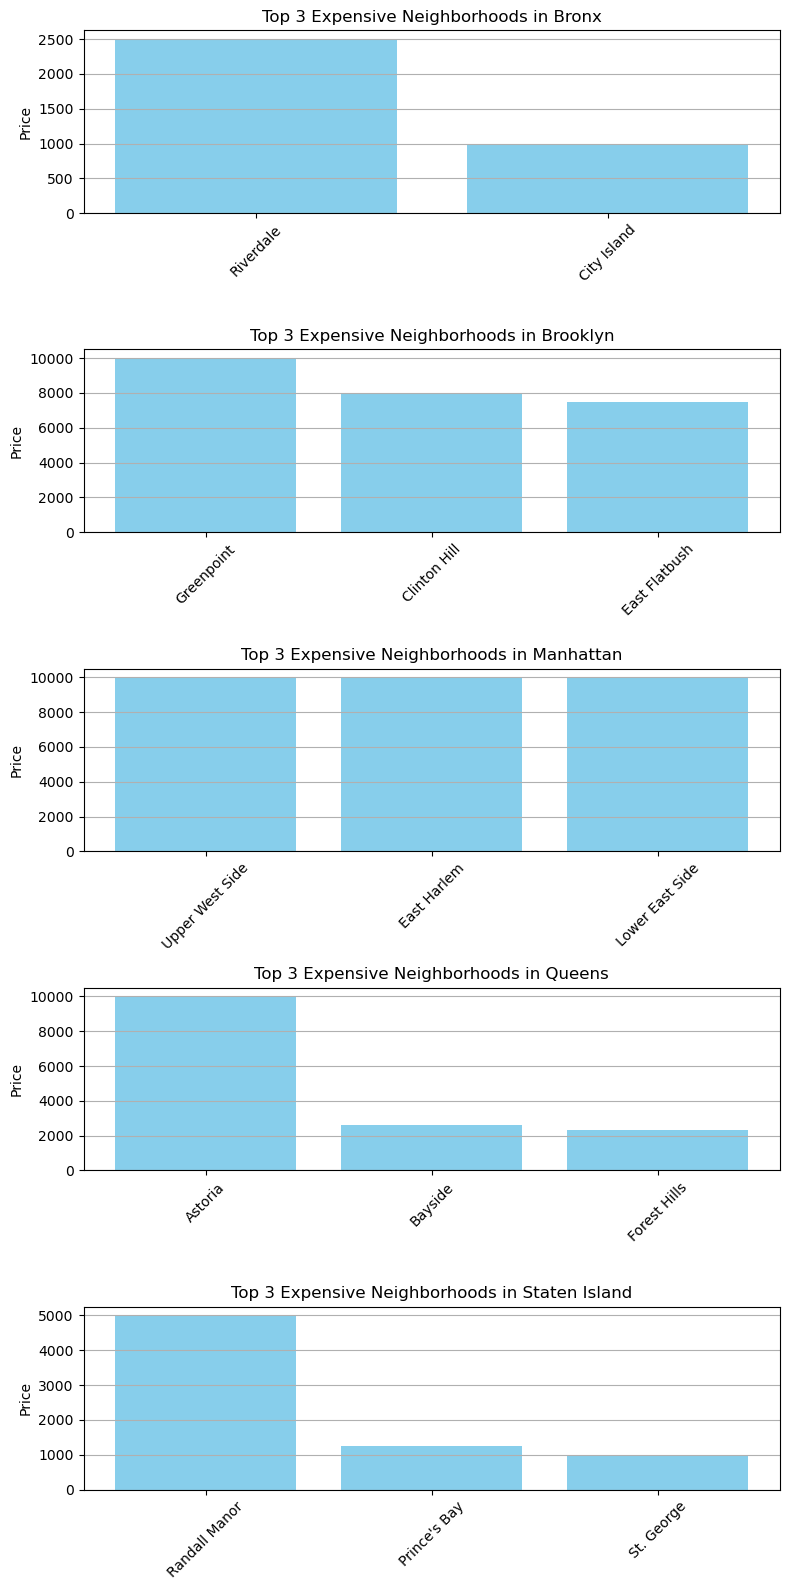

In [32]:
# top 3 expensive neighborhoods in each group,

import matplotlib.pyplot as plt

# Group by neighborhood_group and select the top 3 expensive neighborhoods in each group
top_expensive_neighborhoods = bnb.groupby('neighbourhood_group').apply(lambda x: x.nlargest(3, 'price')).reset_index(drop=True)

# Plot the top 3 expensive neighborhoods in each neighborhood group
fig, axes = plt.subplots(nrows=min(len(top_expensive_neighborhoods), 5), figsize=(8, 16))  # Increased figure size

for i, (group, data) in enumerate(top_expensive_neighborhoods.groupby('neighbourhood_group')):
    if i >= 5:
        break  # Limit to 5 rows
    ax = axes[i]
    ax.bar(data['neighbourhood'], data['price'], color='skyblue')
    ax.set_title(f'Top 3 Expensive Neighborhoods in {group}')
    ax.set_ylabel('Price')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y')

plt.tight_layout()  # Apply tight layout
plt.show()